In [25]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [26]:
files = glob.glob('../results/a2-Apr2/e*') 

In [27]:
files, len(files)

(['../results/a2-Apr2/errors8.pkl.gz',
  '../results/a2-Apr2/errors11.pkl.gz',
  '../results/a2-Apr2/errors3.pkl.gz',
  '../results/a2-Apr2/errors0.pkl.gz',
  '../results/a2-Apr2/errors7.pkl.gz',
  '../results/a2-Apr2/errors5.pkl.gz',
  '../results/a2-Apr2/errors6.pkl.gz',
  '../results/a2-Apr2/errors4.pkl.gz',
  '../results/a2-Apr2/errors2.pkl.gz',
  '../results/a2-Apr2/errors9.pkl.gz',
  '../results/a2-Apr2/errors12.pkl.gz',
  '../results/a2-Apr2/errors10.pkl.gz',
  '../results/a2-Apr2/errors1.pkl.gz',
  '../results/a2-Apr2/errors87.pkl.gz',
  '../results/a2-Apr2/errors95.pkl.gz',
  '../results/a2-Apr2/errors13.pkl.gz',
  '../results/a2-Apr2/errors17.pkl.gz',
  '../results/a2-Apr2/errors15.pkl.gz',
  '../results/a2-Apr2/errors14.pkl.gz',
  '../results/a2-Apr2/errors18.pkl.gz',
  '../results/a2-Apr2/errors22.pkl.gz',
  '../results/a2-Apr2/errors19.pkl.gz',
  '../results/a2-Apr2/errors24.pkl.gz',
  '../results/a2-Apr2/errors21.pkl.gz',
  '../results/a2-Apr2/errors16.pkl.gz',
  '../resu

In [15]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [16]:
list(enumerate(ex_list[0]))

[(0, '../results/a2-Apr2/errors8.pkl.gz'),
 (1, array([ 0.07197163,  0.06115365,  0.03942956,  0.0259102 ,  0.02173654,
          0.01959938,  0.01066403,  0.00649127,  0.0029735 ,  0.00181803,
          0.00150393,  0.00121167])),
 (2, array([ 0.1710829 ,  0.07686265,  0.04950533,  0.03141965,  0.02492289,
          0.02418799,  0.01425633,  0.0086301 ,  0.00439663,  0.00301934,
          0.00262829,  0.00214863])),
 (3, 29.93022394180298),
 (4, 0.0011847073),
 (5, 0.0021486294),
 (6, 0.00074846292),
 (7, 0.0011248451),
 (8, 0.0017990072),
 (9, 0.0029683029),
 (10, 9052),
 (11, 1.3749385364087571e-05),
 (12, [0.81157278467819971, 0.85345329132682934]),
 (13, 0.0005485688674555859),
 (14, 0.9767989609505845),
 (15, ['relu', 'relu'])]

In [17]:
for ex in ex_list:
    if np.isnan(ex[6]):
        ex[6] = 0.02
        ex[7] = 0.02
        ex[8] = 0.005
        ex[9] = 0.005

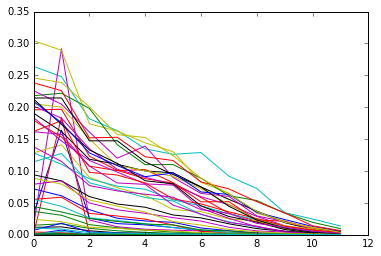

In [18]:
for i, ex in enumerate(ex_list):
    plt.plot(ex[1], label=str(i))

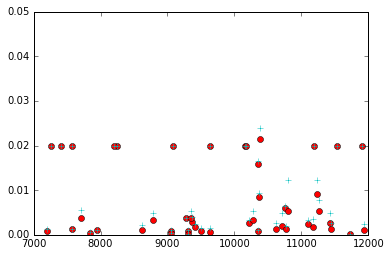

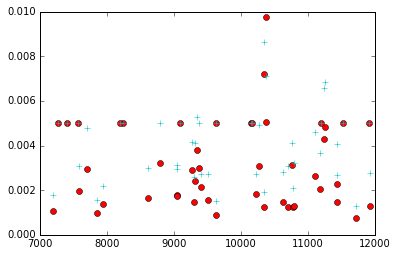

In [19]:
plt.plot([ex[10] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[3] for ex in ex_list], 'ro')

plt.figure()

(0.0, 0.01)

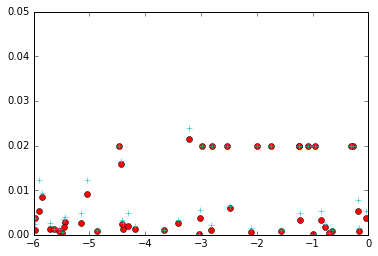

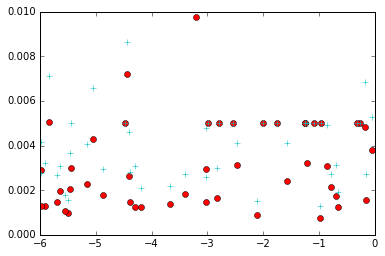

In [20]:
# l2 高いと不安定になる
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)

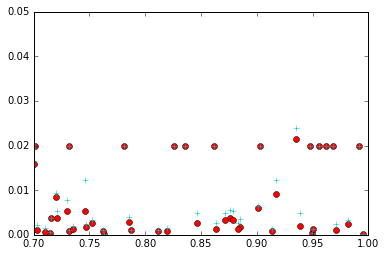

In [21]:
plt.plot([ex[12][0] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[12][0] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot([ex[12][1] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[12][1] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)
plt.figure()

(0.0, 0.01)

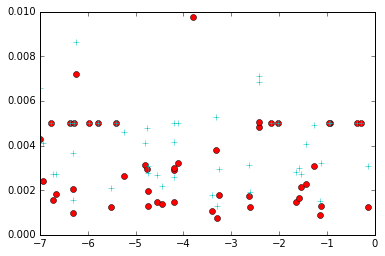

In [22]:
# gamma_scale 敏感すぎ 小さいほうがいい？
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)

In [23]:
# bias_scale 1が無難
plt.plot([ex[14] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[14] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.05)
plt.figure()
plt.plot([ex[14] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[14] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)

(0.0, 0.01)

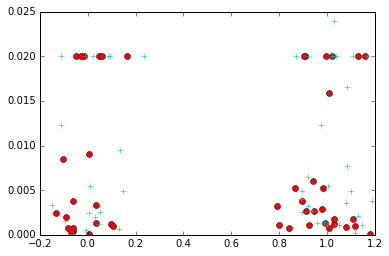

In [24]:
# おなじ
plt.plot([int(ex[15] == ['relu', 'relu'])+0.1*np.random.randn() for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.xlim(-0.2, 1.2)
plt.figure()
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[3] for ex in ex_list], '+')